<h1 style="text-align:center;color:blue;font-size:30px;font-family:times">Ecole Nationale de la Statistique et de l'Analyse Economique Pierre NDIAYE (ENSAE)</h1><br>

<h1 style="text-align:center;color:yellow;font-size:50px;font-family:ALGERIAN;border:solid">Projet de Machine Learning</h1>

<h1 style="text-align:center;color:brown;font-size:50px;font-family:ALGERIAN;border:solid">House prices prediction</h1>

<div style="display:flex;text-align:justify">
    
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:60%"> 
<span style="font-weight:bold">Réalisé par </span> 
    <ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle"> 
        <li>Traoré sié rachid</li>                         
        <li>Sarr el hadj mum</li> 
        <li>Traoré sié rachid</li>                          
        <li>Sarr el hadj mum</li> 
    </ul>
    <span style="font-style: italic;font-size:13px">Élèves Ingénieurs Statisticiens Economistes</span>
</ul>
 
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de:</li> 
 <li>Mme Mously Diaw</li>
    <span style="font-style: italic;font-size:13px">Senior Machine learning Engineer, Entrepreneure @Sen-IA
    </span>
   
</ul>
    
</div>   

> <p style="text-align:justify;font-family:times;font-size:18px;font-style: italic;font-family:Century Schoolbook">
   La structure du projet est bien définie dans le fichier Readme. Notre objectif ici est de réaliser des essais de modèles allant d'une regression multiple aux méthodes ensemblistes en passant par une régularisation en particulier ridge.</p>

<h1 style="text-align:center;color:yellow;font-size:50px;font-family:ALGERIAN;border:solid">ESSAIS DE MODELES</h1>

In [803]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from yellowbrick.regressor import ResidualsPlot
import missingno as msno

In [804]:
train_df = pd.read_csv("../data/train_df.csv")

In [805]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,SaleType,SaleCondition,SalePrice,houseage,houseremodelage,totalsf,totalarea,totalbaths,totalporchsf
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,WD,Normal,12.247699,5,5,2416,2566,3.5,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,WD,Normal,12.109016,31,31,2240,2524,2.5,298
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,WD,Normal,12.317171,7,6,2272,2706,3.5,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,WD,Abnorml,11.849405,91,36,1933,2473,2.0,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,WD,Normal,12.429220,8,8,2853,3343,3.5,276


In [806]:
train_df.select_dtypes("object").shape

(1439, 37)

In [807]:
OverallQual= {
10: "Très excellent",
9: "Excellent",
8: "Très bon",
7: "Bon",
6: "Au-dessus de la moyenne",
5: "Moyenne",
4: "En dessous de la moyenne",
3: "Médiocre",
2: "Mauvais",
1: "Très mauvais"
}

In [808]:
train_df["OverallQual"] = train_df["OverallQual"].map(OverallQual)

In [809]:
OverallCond= { 
10: "Très excellent",
9: "Excellent",
8: "Très bon",
7: "Bon",
6: "Au-dessus de la moyenne",
5: "Moyenne",
4: "En dessous de la moyenne",
3: "Médiocre",
2: "Mauvais",
1: "Très mauvais"
}

In [810]:
train_df["OverallCond"] = train_df["OverallCond"].map(OverallCond)

In [811]:
train_df.OverallQual

0                           Bon
1       Au-dessus de la moyenne
2                           Bon
3                           Bon
4                      Très bon
                 ...           
1434    Au-dessus de la moyenne
1435    Au-dessus de la moyenne
1436                        Bon
1437                    Moyenne
1438                    Moyenne
Name: OverallQual, Length: 1439, dtype: object

In [812]:
ode_cols = ['OverallQual','OverallCond','LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']



In [813]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [814]:
len(ode_cols)

20

In [815]:
len(ohe_cols)

19

In [816]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [817]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [818]:
ode_pipeline = Pipeline(steps=[
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [819]:
ohe_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [820]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [821]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [822]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [823]:
X_preprocessed = pipeline.fit_transform(X)

In [824]:
# TRAIN TEST SPLIT

In [825]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.90, random_state=25)

In [826]:
def get_all_performances(value_train: tuple,
                         values_test: tuple,
                         metrics: list,
                        ) -> pd.DataFrame:
    """ Get all performance metrics listed in `metrics`
    
    Args:
        value_train (tuple): (y_train, y_train_pred)
        values_test (tuple): (y_test, y_test_pred)
        metrics (list): list of metrics to compute
    
    
    Returns:
        pd.DataFrame: column names are: ["metric", "train", "test"]
        
    """
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [827]:
METRICS = [metrics.r2_score,
           metrics.root_mean_squared_error,
           metrics.mean_absolute_percentage_error,
           metrics.max_error,
          ]

In [828]:
def get_input_features(model_pipeline, cat_step_name=None, ode_step_name=None):
    """
    Récupérer les noms des caractéristiques après transformation dans un pipeline.

    Parameters:
    - model_pipeline : pipeline complet du modèle avec un ColumnTransformer.
    - cat_step_name : nom de l'étape de prétraitement pour les variables catégorielles (optionnel).
    - ode_step_name : nom de l'étape de prétraitement pour les variables ordinales (optionnel).

    Returns:
    - Liste des noms de toutes les caractéristiques après transformation.
    """
    # Accéder au préprocesseur (ColumnTransformer) dans le pipeline
    col_trans = model_pipeline.named_steps['preprocessing']
    
    all_feature_names = []

    # Boucle sur chaque transformer dans le ColumnTransformer
    for step_name, pipe_trans, feat_names in col_trans.transformers_:
        if step_name == cat_step_name:
            # Récupérer les noms des caractéristiques après l'encodage OneHotEncoder
            if 'ohe' in pipe_trans.named_steps:  # Vérifie si le pipeline a un OneHotEncoder
                cat_feature_names = pipe_trans.named_steps['ohe'].get_feature_names_out(input_features=feat_names)
                all_feature_names.extend(cat_feature_names)
        elif step_name == ode_step_name:
            # Récupérer les noms des caractéristiques après l'encodage OrdinalEncoder
            if 'ode' in pipe_trans.named_steps:  # Vérifie si le pipeline a un OrdinalEncoder
                ode_feature_names = pipe_trans.named_steps['ode'].categories_[0]  # Cela renvoie les catégories de l'OrdinalEncoder
                all_feature_names.extend(ode_feature_names)
        else:
            # Ajouter les noms des caractéristiques pour les autres étapes (numériques)
            all_feature_names.extend(feat_names)

    # Retourner tous les noms des caractéristiques
    return all_feature_names



In [829]:
#build models

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">LinearRegression</h1>

In [830]:
lr = LinearRegression()

In [831]:
lr.fit(X_train, y_train)

LinearRegression()

In [832]:
y_pred_lr = lr.predict(X_test)

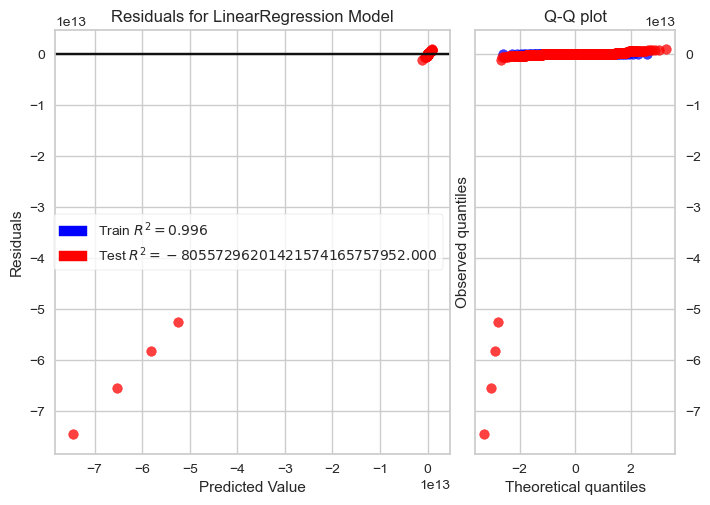

<Figure size 800x550 with 0 Axes>

In [833]:
res_viz = ResidualsPlot(lr,
                        is_fitted="auto",
                        qqplot=True,
                        hist=False,
                        train_color="blue",
                        test_color="red",
                       )
res_viz.fit(X_train, y_train)
res_viz.score(X_test, y_test)
res_viz.show(clear_figure=True);

In [834]:
# get performances in train & test
perform=get_all_performances(value_train=(y_train, lr.predict(X_train)),
                     values_test=(y_test, lr.predict(X_test)),
                     metrics=METRICS
                    )
perform

,metric,train,test
0,r2_score,0.996194,-8.055730e+25
1,mean_squared_error,0.000545,1.233204e+25
2,mean_absolute_percentage_error,0.001540,2.014303e+10
3,max_error,0.058714,7.452280e+13


In [835]:
model_features = get_input_features(pipeline, cat_step_name="ohe_p", ode_step_name="ode_p")
model_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'houseage',
 'houseremodelage',
 'totalsf',
 'totalarea',
 'totalbaths',
 'totalporchsf',
 'Au-dessus de la moyenne',
 'Bon',
 'En dessous de la moyenne',
 'Excellent',
 'Mauvais',
 'Moyenne',
 'Médiocre',
 'Très bon',
 'Très excellent',
 'Très mauvais',
 'Street_Grvl',
 'Street_Pave',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborh

In [836]:
df_feature_importance = pd.DataFrame(
    lr.coef_, 
    columns=["coef"],
    index=model_features # Les noms des caractéristiques
)

df_feature_importance.head()

ValueError: Shape of passed values is (194, 1), indices imply (184, 1)

In [661]:
df_feature_importance = pd.DataFrame(lr.coef_, columns=["coef"], index=train_df.columns)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

ValueError: Shape of passed values is (194, 1), indices imply (60, 1)

In [610]:
# Sauvegarder dans un fichier
joblib.dump(perform, "lr_performance.pkl")

['lr_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">Ridge</h1>

In [611]:
ridge = Ridge()

In [612]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [613]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [614]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [615]:
np.sqrt(-1 * ridge_cv.best_score_)

0.11354729573868651

In [616]:
perform=get_all_performances(value_train=(y_train, ridge_cv.predict(X_train)),
                     values_test=(y_test, ridge_cv.predict(X_test)),
                     metrics=METRICS
                    )
perform

,metric,train,test
0,r2_score,0.974488,0.894242
1,mean_squared_error,0.003657,0.016190
2,mean_absolute_percentage_error,0.004058,0.007501
3,max_error,0.159866,0.784996


In [617]:
# Sauvegarder dans un fichier
joblib.dump(perform, "ridge_cv_performance.pkl")

['ridge_cv_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">Lasso</h1>

In [618]:
Lasso = Lasso()

In [619]:
param_grid_Lasso = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10]
}

In [620]:
Lasso_cv = GridSearchCV(Lasso, param_grid_Lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [621]:
Lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10]},
             scoring='neg_mean_squared_error')

In [622]:
np.sqrt(-1 * Lasso_cv.best_score_)

0.1425134120177412

In [ ]:
perform=get_all_performances(value_train=(y_train, Lasso_cv.predict(X_train)),
                     values_test=(y_test, Lasso_cv.predict(X_test)),
                     metrics=METRICS
                    )
perform

,metric,train,test
0,r2_score,0.874155,0.829379
1,mean_squared_error,0.018038,0.026119
2,mean_absolute_percentage_error,0.008102,0.009599
3,max_error,0.534048,0.972317


In [624]:
coefficients = Lasso_cv.best_estimator_.coef_
# Si X_train est un DataFrame, récupérer les noms des colonnes
X_train=pd.DataFrame(X_train)
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]

# Créer un DataFrame avec noms et coefficients
df_feature_importance = pd.DataFrame({
    "feature": feature_names,
    "coef": coefficients
})

# Filtrer uniquement les coefficients significatifs
df_significant = df_feature_importance[df_feature_importance["coef"] != 0]

# Afficher les résultats
print(df_significant)



    feature      coef
3         3  0.118968
12       12  0.044166
16       16 -0.054278
18       18  0.027876
19       19  0.113522
20       20  0.004776
37       37 -0.004649


In [631]:
# Extraire les coefficients du modèle
df_feature_importance = pd.DataFrame(
    Lasso_cv.best_estimator_.coef_, 
    columns=["coef"],
    index=X_train.columns # Les noms des caractéristiques
)

df_feature_importance.head()


,coef
0,-0.000000
1,0.000000
2,0.000000
3,0.118968
4,0.000000


In [ ]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 7))
)
plt.title("Lasso model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

In [475]:
# Sauvegarder dans un fichier
joblib.dump(perform, "Lasso_cv_performance.pkl")

['Lasso_cv_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">Elasticnet</h1>

In [476]:
ElasticNet = ElasticNet()

In [477]:
param_grid_ElasticNet = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1]
}

In [478]:
ElasticNet_cv = GridSearchCV(ElasticNet, param_grid_ElasticNet, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [479]:
ElasticNet_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'l1_ratio': [0.1, 0.5, 0.9, 1]},
             scoring='neg_mean_squared_error')

In [480]:
np.sqrt(-1 * ElasticNet_cv.best_score_)

0.11932814580036884

In [ ]:
perform=get_all_performances(value_train=(y_train, ElasticNet_cv.predict(X_train)),
                     values_test=(y_test, ElasticNet_cv.predict(X_test)),
                     metrics=METRICS
                    )
perform


,metric,train,test
0,r2_score,0.952637,0.890019
1,mean_squared_error,0.006789,0.016836
2,mean_absolute_percentage_error,0.005123,0.007538
3,max_error,0.264722,0.825999


In [ ]:
df_feature_importance = pd.DataFrame(Lasso_cv.best_estimator_.coef_, columns=["coef"], index=ElasticNet_cv.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

AttributeError: 'GridSearchCV' object has no attribute 'feature_names_in_'

In [482]:
# Sauvegarder dans un fichier
joblib.dump(perform, "ElasticNet_cv_performance.pkl")

['ElasticNet_cv_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">RandomForestRegressor</h1>

In [483]:
RFR = RandomForestRegressor(random_state=13)

In [484]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [485]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [487]:
np.sqrt(-1 * rfr_cv.best_score_)

0.14426010037820067

In [488]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [489]:
# get performances in train & test
perform=get_all_performances(value_train=(y_train, rfr_cv.predict(X_train)),
                     values_test=(y_test, rfr_cv.predict(X_test)),
                     metrics=METRICS
                    )
perform

,metric,train,test
0,r2_score,0.978366,0.843344
1,mean_squared_error,0.003101,0.023981
2,mean_absolute_percentage_error,0.003280,0.008988
3,max_error,0.249473,0.916301


In [490]:
# Sauvegarder dans un fichier
joblib.dump(perform, "rfr_cv_performance.pkl")

['rfr_cv_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">XGBRegressor</h1>

In [491]:
XGB = XGBRegressor(random_state=13)

In [492]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [493]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [495]:
np.sqrt(-1 * xgb_cv.best_score_)

0.1266685127830311

In [ ]:
perform=get_all_performances(value_train=(y_train, xgb_cv.predict(X_train)),
                     values_test=(y_test, xgb_cv.predict(X_test)),
                     metrics=METRICS
                    )
# Sauvegarder dans un fichier
joblib.dump(perform, "xgb_cv_performance.pkl")

['xgb_cv_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">GradientBoostingRegressor</h1>

In [497]:
GBR = GradientBoostingRegressor()

In [498]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [499]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
GBR_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [163]:
np.sqrt(-1 * GBR_cv.best_score_)

0.11337403588170691

In [164]:
perform=get_all_performances(value_train=(y_train, GBR_cv.predict(X_train)),
                     values_test=(y_test, GBR_cv.predict(X_test)),
                     metrics=METRICS
                    )
# Sauvegarder dans un fichier
joblib.dump(perform, "GBR_cv_performance.pkl")

['GBR_cv_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">LGBMRegressor</h1>

In [165]:
lgbm_regressor = lgb.LGBMRegressor()

In [166]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [167]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [168]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 112
[LightGBM] [Info] Start training from score 12.023259


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [169]:
np.sqrt(-1 * lgbm_cv.best_score_)

0.12728980697034004

In [170]:
perform=get_all_performances(value_train=(y_train, lgbm_cv.predict(X_train)),
                     values_test=(y_test, lgbm_cv.predict(X_test)),
                     metrics=METRICS
                    )
# Sauvegarder dans un fichier
joblib.dump(perform, "lgbm_cv_performance.pkl")

['lgbm_cv_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">CatBoostRegressor</h1>

In [171]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [172]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [173]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [174]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001930D8CDD00>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [175]:
np.sqrt(-1 * cat_cv.best_score_)

0.11495736655121701

In [176]:
perform=get_all_performances(value_train=(y_train, cat_cv.predict(X_train)),
                     values_test=(y_test, cat_cv.predict(X_test)),
                     metrics=METRICS
                    )
# Sauvegarder dans un fichier
joblib.dump(perform, "cat_cv_performance.pkl")

['cat_cv_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">VotingRegressor</h1>

In [177]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [178]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=15,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_m...
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('ridge', Ridge(alpha=5, solver='lsqr'))],
                weights=[2, 3, 1])

In [179]:
y_pred_vr = vr.predict(X_test)

In [180]:
mean_squared_error(y_test, y_pred_vr, squared=False)

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.11764746537436542

In [181]:
perform=get_all_performances(value_train=(y_train, vr.predict(X_train)),
                     values_test=(y_test, vr.predict(X_test)),
                     metrics=METRICS
                    )
# Sauvegarder dans un fichier
joblib.dump(perform, "vr_performance.pkl")

['vr_performance.pkl']

<h1 style="text-align:center;color:green;font-size:30px;font-family:ALGERIAN;border:solid">StackingRegressor</h1>

In [182]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [183]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

In [184]:
stackreg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 112
[LightGBM] [Info] Start training from score 12.023259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 106
[LightGBM] [Info] Start training from score 12.032469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=15,
                                                         max_features=0.1,
                                                         min_samples_leaf=25,
                                                         n_estimators=1000)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.05,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=1,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=13, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=5,
                                                                     solver='lsqr'))],
                                                  weights=[2, 3, 1]))

In [185]:
y_pred_stack = stackreg.predict(X_test)

In [186]:
mean_squared_error(y_test, y_pred_stack, squared=False)

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.11546975960774497

In [187]:
perform=get_all_performances(value_train=(y_train, stackreg.predict(X_train)),
                     values_test=(y_test, stackreg.predict(X_test)),
                     metrics=METRICS
                    )
# Sauvegarder dans un fichier
joblib.dump(perform, "stackreg_performance.pkl")

['stackreg_performance.pkl']

<h1 style="text-align:center;color:yellow;font-size:50px;font-family:ALGERIAN;border:solid">ESSAIS DE MODELES</h1>

In [188]:
import joblib

joblib.dump(ridge_cv, 'ridge_model.pkl')
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']